**HW4**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data_path = "/covertype.csv"
df = pd.read_csv('/covertype.csv')

In [ ]:
df

,index,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,wilderness_type,usfs_code,usfs_code_desc,climatic_zone,geologic_zone,cover_type
0,0,2596,51,3,258,0,510,221,232,148,6279,Rawah,7745,"Como - Legault families complex, extremely stony",subalpine,igneous and metamorphic,Aspen
1,1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,7745,"Como - Legault families complex, extremely stony",subalpine,igneous and metamorphic,Aspen
2,2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,4744,"Legault family - Rock land complex, stony",montane,igneous and metamorphic,Lodgepole Pine
3,3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,7746,Como family - Rock land - Legault family compl...,subalpine,igneous and metamorphic,Lodgepole Pine
4,4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,7745,"Como - Legault families complex, extremely stony",subalpine,igneous and metamorphic,Aspen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,581007,2396,153,20,85,17,108,240,237,118,837,Comanche Peak,2703,"Vanet - Ratake families complex, very stony",lower montane,igneous and metamorphic,Ponderosa Pine
581008,581008,2391,152,19,67,12,95,240,237,119,845,Comanche Peak,2703,"Vanet - Ratake families complex, very stony",lower montane,igneous and metamorphic,Ponderosa Pine
581009,581009,2386,159,17,60,7,90,236,241,130,854,Comanche Peak,2703,"Vanet - Ratake families complex, very stony",lower montane,igneous and metamorphic,Ponderosa Pine
581010,581010,2384,170,15,60,5,90,230,245,143,864,Comanche Peak,2703,"Vanet - Ratake families complex, very stony",lower montane,igneous and metamorphic,Ponderosa Pine


**1. Distribution of cover_type across different wilderness_type**

<Figure size 1000x600 with 0 Axes>

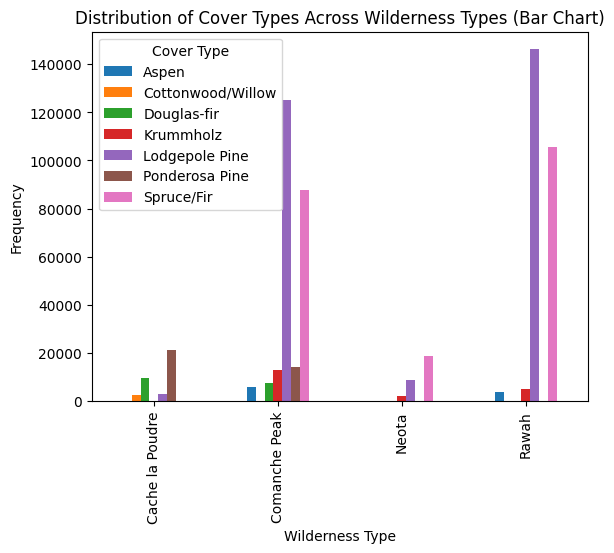

In [ ]:
plt.figure(figsize=(10, 6))
df.groupby(["wilderness_type", "cover_type"]).size().unstack().plot(kind="bar", stacked=False)
plt.xlabel("Wilderness Type")
plt.ylabel("Frequency")
plt.title("Distribution of Cover Types Across Wilderness Types (Bar Chart)")
plt.legend(title="Cover Type")
plt.show()

**2. Distribution of elevation on each cover type**

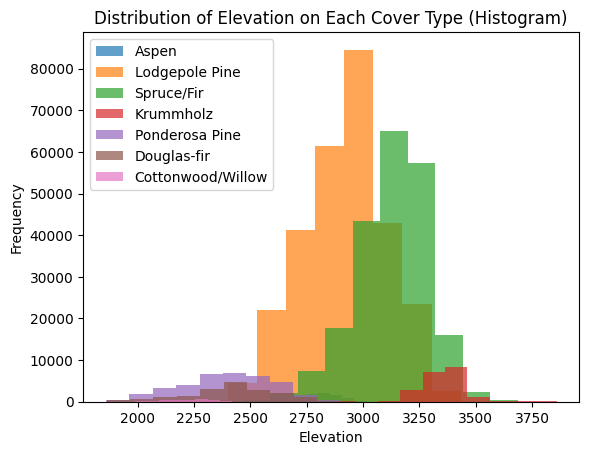

In [ ]:
for cover_type in df["cover_type"].unique():
    df_current = df[df["cover_type"] == cover_type]
    plt.hist(df_current["elevation"], label=cover_type, alpha=0.7)

plt.xlabel("Elevation")
plt.ylabel("Frequency")
plt.title("Distribution of Elevation on Each Cover Type (Histogram)")
plt.legend()
plt.show()

**3. Number of data points on each climatic zone**

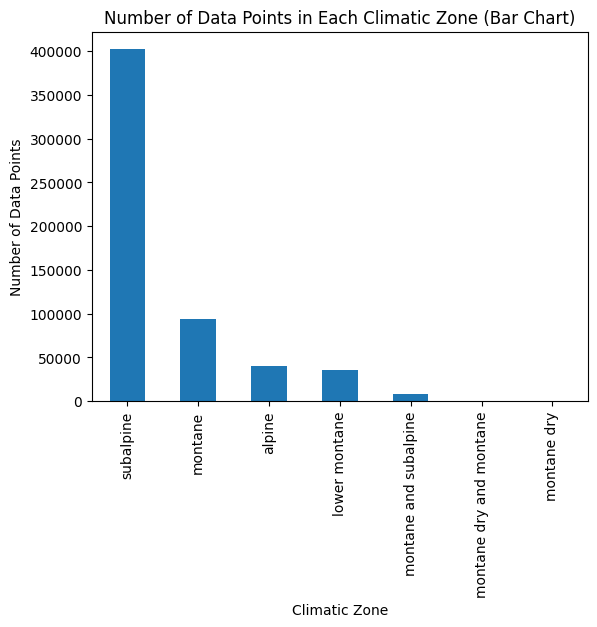

In [ ]:
zone_counts = df["climatic_zone"].value_counts()
zone_counts.plot(kind="bar", colormap="tab20")
plt.xlabel("Climatic Zone")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points in Each Climatic Zone (Bar Chart)")
plt.show()

**4. Which cover type dominates subalpine climate?**

In [ ]:
df_subalpine = df[df["climatic_zone"] == "subalpine"]

dominant_cover_type = df_subalpine["cover_type"].mode()[0]

print("The dominant cover type in the 'subalpine' climatic zone is:", dominant_cover_type)
# print(dominant2_cover_type)


The dominant cover type in the 'subalpine' climatic zone is: Lodgepole Pine


**5. Which cover type is likely to be found near a body of water?**

In [ ]:
df["combined_distance"] = np.abs(df["horizontal_distance_to_hydrology"]) + np.abs(df["vertical_distance_to_hydrology"])
grouped_data = df.groupby("cover_type")["combined_distance"].mean()  # Or "min", "median", etc.

lowest_distance_cover_type = grouped_data.idxmin()
print(lowest_distance_cover_type)

Cottonwood/Willow


**6. Which cover type is likely to be found in a shady area from 9 am to noon?**

In [ ]:
df["average_shading"] = (df["hillshade_9am"] + df["hillshade_noon"]) / 2
df["max_shading"] = df[["hillshade_9am", "hillshade_noon"]].max(axis=1)
grouped_data2 = df.groupby("cover_type")["average_shading"].mean()

highest_shading_cover_type = grouped_data2.idxmax()
print(highest_shading_cover_type)

Cottonwood/Willow


**7. Which cover type is likely to be found away from hazardous points (roadways/firepoints)?**

In [ ]:
df["combined_distance_roadway"] = np.abs(df["horizontal_distance_to_roadways"]) + np.abs(df["horizontal_distance_to_fire_points"])

grouped_data = df.groupby("cover_type")["combined_distance_roadway"].mean()  # Or "min", "median", "max" for different criteria

lowest_distance_cover_type2 = grouped_data.idxmax()
print(lowest_distance_cover_type2)


Krummholz


**8. Determine whether elevation provides more information to distinguish Krummholz from
Cottonwood/Willow than horizontal_distance_to_hydrology ?
Ans. No horizontal_distance_to_hydrology can confirm that is cotton wood/ willow more than elevation**

In [ ]:

df[['climatic_zone','horizontal_distance_to_hydrology','vertical_distance_to_hydrology','hillshade_9am','hillshade_noon','cover_type',"combined_distance", "average_shading", "max_shading"]].sort_values(by='max_shading', ascending=False).head(20)
# df[(df['cover_type'] == 'Cottonwood/Willow')]


,climatic_zone,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,hillshade_9am,hillshade_noon,cover_type,combined_distance,average_shading,max_shading
557065,subalpine,228,51,200,254,Lodgepole Pine,279,227.0,254
479999,subalpine,95,41,192,254,Lodgepole Pine,136,223.0,254
361564,lower montane,180,43,186,254,Ponderosa Pine,223,220.0,254
480001,subalpine,127,42,190,254,Lodgepole Pine,169,222.0,254
361563,lower montane,180,37,184,254,Ponderosa Pine,217,219.0,254
480002,subalpine,150,50,191,254,Lodgepole Pine,200,222.5,254
480003,subalpine,175,55,193,254,Lodgepole Pine,230,223.5,254
480004,subalpine,180,72,196,254,Lodgepole Pine,252,225.0,254
556239,lower montane,270,-18,188,254,Lodgepole Pine,288,221.0,254
480005,subalpine,180,69,199,254,Lodgepole Pine,249,226.5,254


In [ ]:
print(df.cover_type.unique())
print(df.climatic_zone.unique())
print(df.usfs_code_desc.unique())

['Aspen' 'Lodgepole Pine' 'Spruce/Fir' 'Krummholz' 'Ponderosa Pine'
 'Douglas-fir' 'Cottonwood/Willow']
['subalpine' 'montane' 'montane and subalpine' 'alpine' 'montane dry'
 'lower montane' 'montane dry and montane']
['Como - Legault families complex, extremely stony'
 'Legault family - Rock land complex, stony'
 'Como family - Rock land - Legault family complex, extremely stony'
 'Rogert family, very stony' 'Cryaquolis - Cryoborolis complex'
 'Typic Cryaquepts - Typic Cryaquolls complex'
 'Leighcan family, extremely stony'
 'Leighcan family, till substratum - Typic Cryaquolls complex'
 'Moran family - Cryorthents - Rock land complex, extremely stony'
 'Typic Cryaquolis - Borohemists complex'
 'Supervisor - Limber families complex'
 'Leighcan family, till substratum, extremely bouldery'
 'Moran family - Cryorthents - Leighcan family complex, extremely stony'
 'Troutville family, very stony'
 'Leighcan - Moran families - Cryaquolls complex, extremely stony'
 'Leighcan - Catamount famil

**9. Plot histogram of elevation, aspect, and slope. Discuss the shape of the
distribution.**

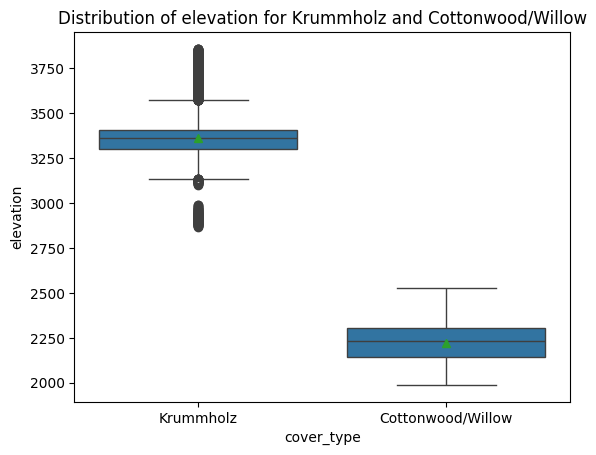

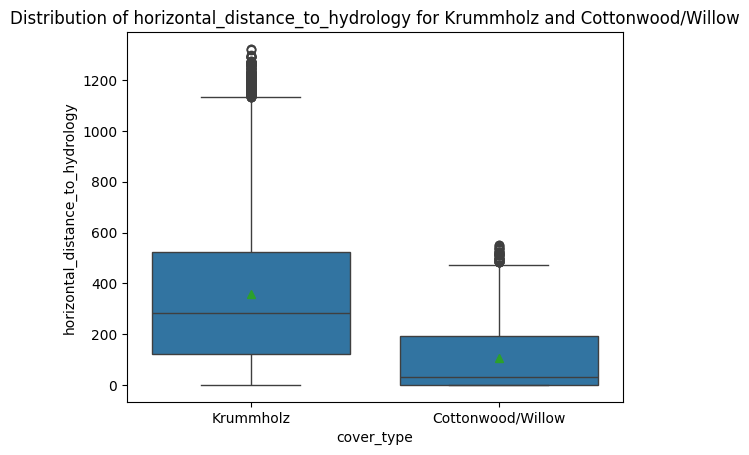

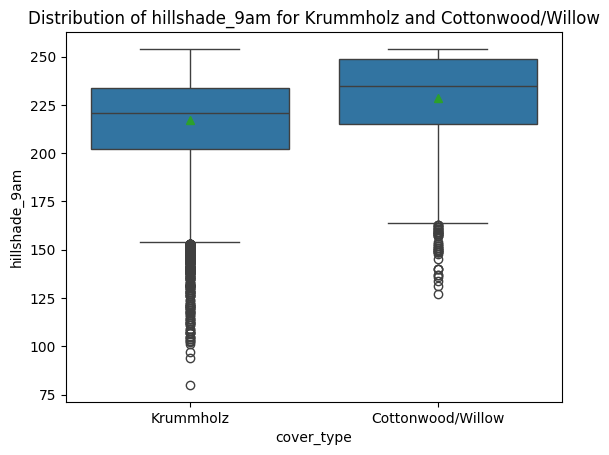

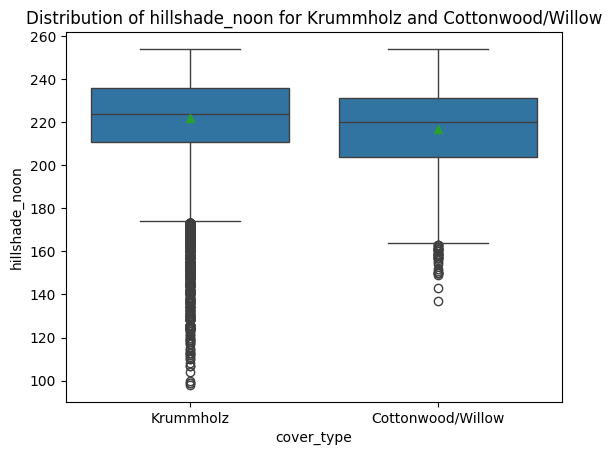

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = df[df["cover_type"].isin(["Krummholz", "Cottonwood/Willow"])]

features = ["elevation", "horizontal_distance_to_hydrology", "hillshade_9am", "hillshade_noon"]
for feature in features:
    sns.boxplot(
        x = "cover_type",
        y = feature,
        showmeans=True,
        data=df_filtered
    )
    plt.title(f"Distribution of {feature} for Krummholz and Cottonwood/Willow")
    plt.show()

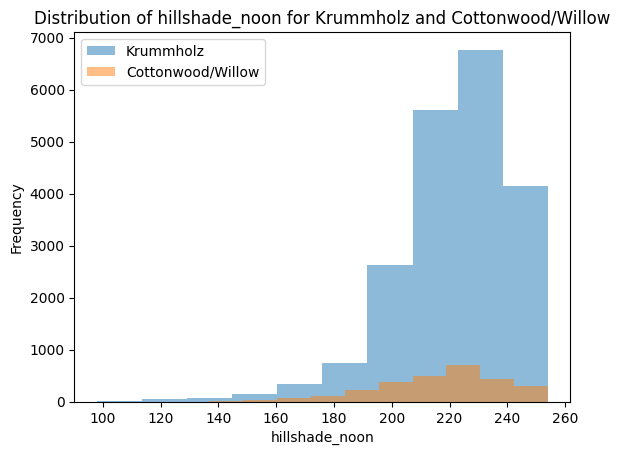

In [ ]:
plt.hist(df_filtered[feature][df_filtered["cover_type"] == "Krummholz"], alpha=0.5, label="Krummholz")
plt.hist(df_filtered[feature][df_filtered["cover_type"] == "Cottonwood/Willow"], alpha=0.5, label="Cottonwood/Willow")
plt.xlabel(feature)
plt.ylabel("Frequency")
plt.title(f"Distribution of {feature} for Krummholz and Cottonwood/Willow")
plt.legend()
plt.show()


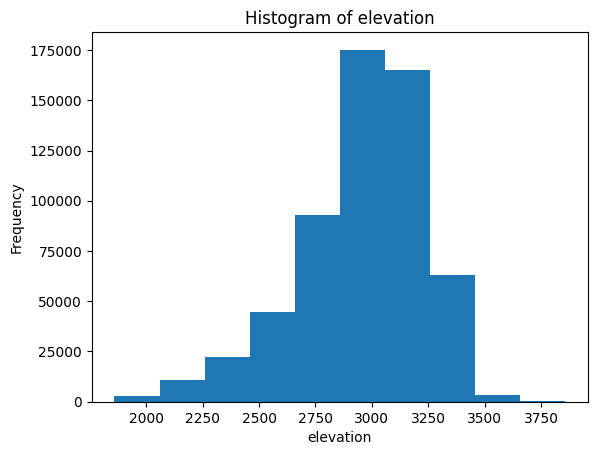

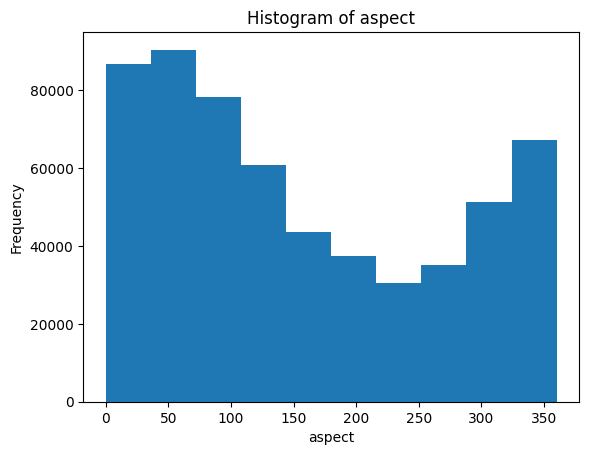

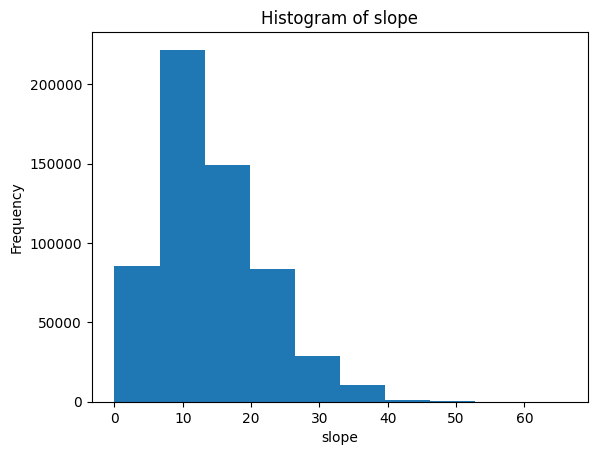

In [ ]:
features = ["elevation", "aspect", "slope"]
df_features = df[features]
for feature in features:
    plt.hist(df_features[feature])
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {feature}")
    plt.show()


**10. For each member in your group, plot another useful visualization from this dataset.**

**Member1**

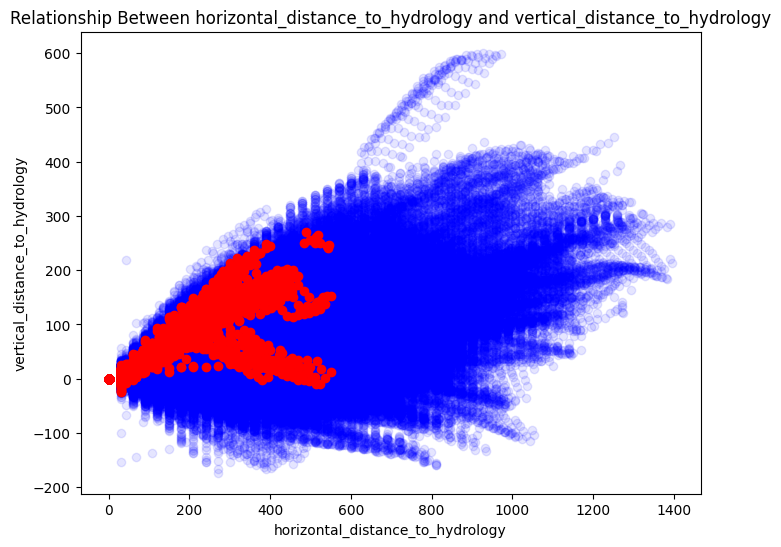

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df.horizontal_distance_to_hydrology, df.vertical_distance_to_hydrology, alpha=0.1, c="blue")
plt.scatter(df[(df['cover_type'] == 'Cottonwood/Willow')].horizontal_distance_to_hydrology, df[(df['cover_type'] == 'Cottonwood/Willow')].vertical_distance_to_hydrology, c="red")

plt.xlabel("horizontal_distance_to_hydrology")
plt.ylabel("vertical_distance_to_hydrology")
plt.title("Relationship Between horizontal_distance_to_hydrology and vertical_distance_to_hydrology")
plt.show()

This scatter show that the cover type that nearly hydrology is Cottonwood/Willow show in red dot grouping nearly zero values

**Member2**

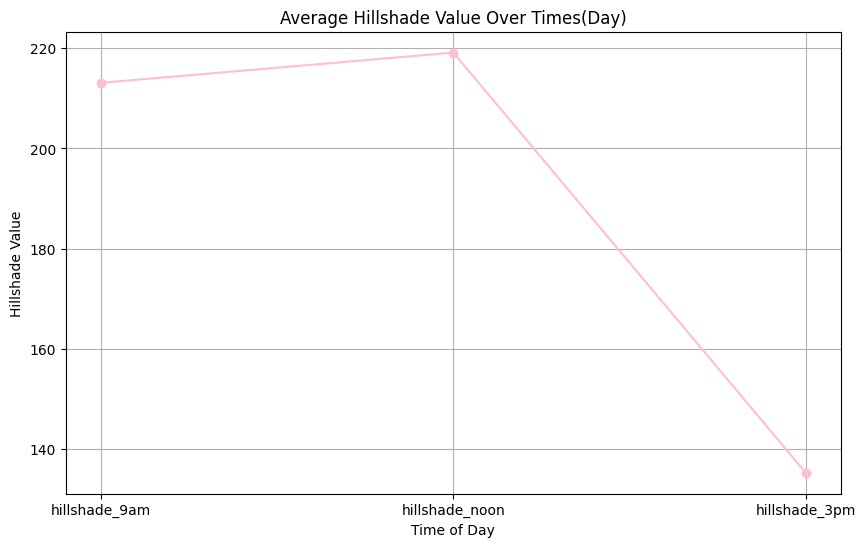

In [12]:
import matplotlib.pyplot as plt

hillshade_9am = df['hillshade_9am']
hillshade_noon = df['hillshade_noon']
hillshade_3pm = df['hillshade_3pm']

times = ['hillshade_9am', 'hillshade_noon', 'hillshade_3pm']

plt.figure(figsize=(10, 6))
plt.plot(times, [hillshade_9am.mean(), hillshade_noon.mean(), hillshade_3pm.mean()], marker='o', color='pink')

plt.xlabel('Time of Day')
plt.ylabel('Hillshade Value')
plt.title('Average Hillshade Value Over Times(Day)')

plt.grid(True)
plt.show()

This graph visualizes the average hillshade value over different times of day, as seen at 9 a.m., noon, and 3 p.m. From 9 a.m. to before noon, its value tends to gradually increase until it reaches a peak at noon, then decreases till 3 p.m.

**Member3**

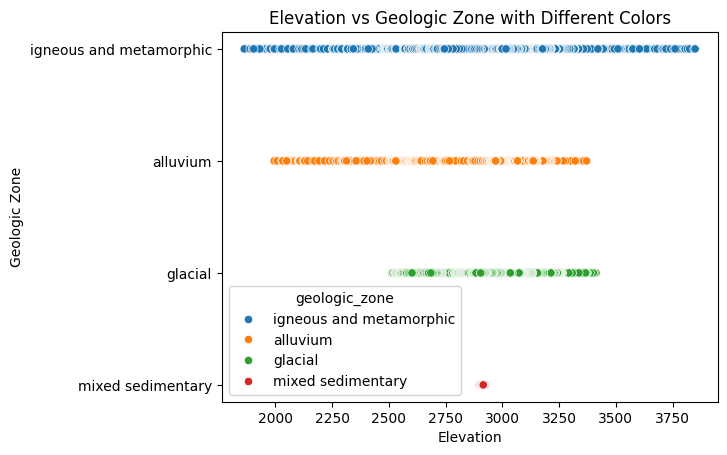

In [12]:
sns.scatterplot(x='elevation', y='geologic_zone', hue='geologic_zone', data=df)

plt.xlabel('Elevation')
plt.ylabel('Geologic Zone')
plt.title('Elevation vs Geologic Zone with Different Colors')

plt.show()

The graph shows that the elevation of the geological zones increases from left to right. The igneous and metamorphic zone is stand for all elevation zone, followed by the alluvium zone is the elevation stared below 2000 to around 3400, the glacial zone the range is between 2500 to 3450, and the mixed sedimentary zone is strongly stand on 2900.

**Member4**

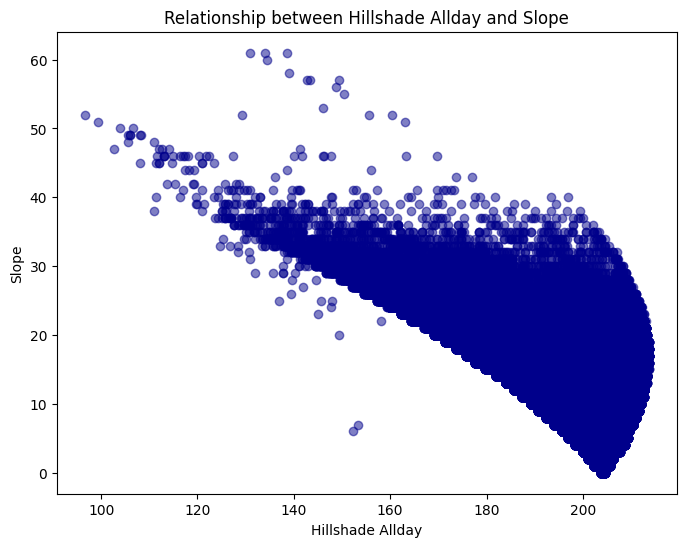

In [15]:
covertype = df
covertype['Hillshade Allday'] = covertype[['hillshade_9am', 'hillshade_noon', 'hillshade_3pm']].mean(axis=1)

plt.figure(figsize=(8, 6))
plt.scatter(covertype['Hillshade Allday'], covertype['slope'], color='darkblue', alpha=0.5)

plt.title('Relationship between Hillshade Allday and Slope')
plt.xlabel('Hillshade Allday')
plt.ylabel('Slope')

plt.show()

The Hillshade represent the amount of illumination a terrain receives, simulating the effects of sunlight on the landscape. The chart indicates that places with gentle slopes generally receive more shade throughout the day, resulting in higher average hillshade values. On the other hand, areas with steeper slopes tend to receive less shade, leading to lower hillshade values.

**Member5**

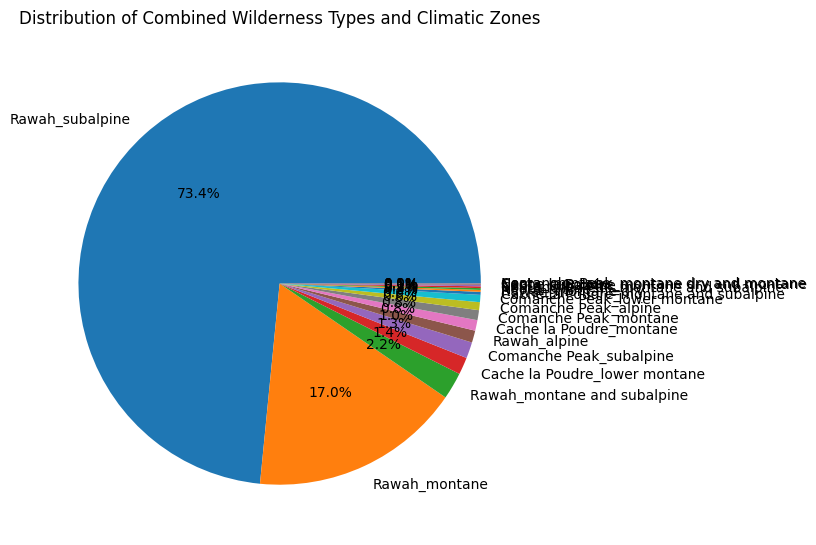

In [16]:
data = df

data['combined'] = data['wilderness_type'] + '_' + data['climatic_zone']

plt.figure(figsize=(8, 8))
data['combined'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Combined Wilderness Types and Climatic Zones')
plt.ylabel('')
plt.tight_layout()
plt.show()

A pie chart combining wilderness types and climatic zones, displaying probability percentages.

**Member6**

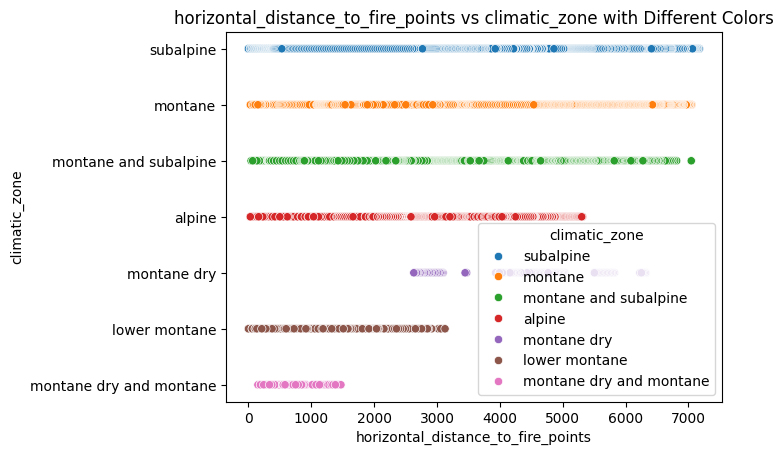

In [19]:
sns.scatterplot(x='horizontal_distance_to_fire_points', y='climatic_zone', hue='climatic_zone', data=df)

plt.xlabel('horizontal_distance_to_fire_points')
plt.ylabel('climatic_zone')
plt.title('horizontal_distance_to_fire_points vs climatic_zone with Different Colors')

plt.show()

This graft show label of fire distance and climatic zone to combine the fire distance with climatic zone
